In [ ]:
!pip install table_evaluator

In [ ]:
! pip install fitter

In [88]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from numpy.random import randn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from keras import backend
from keras.constraints import Constraint
from keras.models import load_model
import math
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [89]:
# in_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Training_formodeling.csv')
data = pd.read_csv('/content/data/Training_formodeling.csv')
print (data.shape)
print (data.tail())
print (data.columns)

(511, 168)
       X  ntl_ai  ntl_area_mn  ntl_cai_mn  ntl_clumpy  ntl_cohesion  \
506  509 98.5449 223,621.9184     58.8503      0.9637       99.7920   
507  510 93.4793  12,754.6162     44.8905      0.9216       95.2149   
508  511 93.9203  16,026.2921     45.6200      0.9352       96.1687   
509  203 94.4751  37,587.3744     70.1571      0.9554       97.1578   
510  204 94.7368  18,203.3096     68.6486      2.1471       99.7943   

     ntl_contig_mn  ntl_dcad  ntl_ed  ntl_lpi  ...  BIH  MKD  GEO  MNG  LAO  \
506         0.8276    0.0004  0.4939  83.0502  ...    0    0    0    0    0   
507         0.6539    0.0017  0.8429  14.4008  ...    0    0    0    0    0   
508         0.7336    0.0025  1.0271  24.8332  ...    0    0    0    0    0   
509         0.8783    0.0011  0.7181  20.9315  ...    0    0    0    0    0   
510         0.8631    0.0052  0.6721  94.8718  ...    0    0    0    0    0   

     LTU  NAM  ARM  HRV  bins  
506    0    0    0    0    19  
507    0    0    0    0

In [90]:
features = list(data.columns)
features.remove('X')
remove_list=['AUT', 'BEL', 'CAN', 'CHE', 'CHL', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN', 'IRL', 'ITA', 
                  'JPN', 'KOR', 'MEX', 'NLD', 'NOR', 'POL', 'PRT', 'SVK', 'SVN', 'SWE', 'USA', 'NGA', 'BEN', 'ARE', 'VEN', 'GHA', 'SAU', 'QAT', 'YEM',
                   'TUR', 'ETH', 'AUS', 'MAR', 'IND', 'PRI', 'IRN', 'CHN', 'KAZ', 'IRQ', 'EGY', 'SYR', 'SDN', 'BHR', 'KWT','IDN', 'JOR', 'UZB', 'PHL',
                   'DZA', 'MDG', 'BRA', 'PER', 'RUS', 'COL', 'TZA', 'TKM', 'ERI', 'NZL', 'PAK', 'ARG', 'AZE', 'MLI', 'LBY', 'CAF', 'GMB', 'BGD', 'LBN', 
                  'ISR', 'MOZ', 'SRB', 'KGZ', 'GNB', 'MWI', 'ZAF', 'BFA', 'ROU', 'BDI', 'ZWE', 'CUB', 'VNM', 'MDA', 'HND', 'THA', 'GTM', 'PRY', 'BOL', 'LKA',
                   'GIN', 'ECU', 'SEN', 'DJI', 'UKR', 'CMR', 'TJK', 'SLE', 'SOM', 'AFG', 'AGO', 'MYS', 'UGA', 'NPL', 'RWA', 'JAM', 'COD', 'ZMB', 'GAB', 'NIC',
                   'MMR', 'OMN', 'KEN', 'LBR', 'URY', 'NER', 'MRT', 'PRK', 'BGR', 'COG', 'HTI', 'PNG', 'LVA', 'TUN', 'SLV', 'DOM', 'BIH', 'MKD', 'GEO', 'MNG',
                   'LAO', 'LTU', 'NAM', 'ARM', 'HRV','ntl_ai']
#  'ntl_area_mn',
#  'ntl_cai_mn',
#  'ntl_clumpy',
#  'ntl_cohesion',
#  'ntl_contig_mn',
#  'ntl_dcad',
#  'ntl_ed',
#  'ntl_lpi',
#  'ntl_lsi',
#  'ntl_np',
#  'ntl_pd',
#  'ntl_pladj',
#  'ntl_pland',
#  'ntl_shape_mn',
#  'ntl_split',
#  'ntl_te',
#  'ntl_sum',
#  'ntl_count',
#  'ntl_median',
#  'ntl_variance']
features = list(filter(lambda i: i not in remove_list, features))
label = ['bins']
X = data[features]
# y = tf.keras.utils.to_categorical(data[label])
y = data[label]
# in_data=in_data[features]
data=data[features]

In [91]:
features

['ntl_area_mn',
 'ntl_cai_mn',
 'ntl_clumpy',
 'ntl_cohesion',
 'ntl_contig_mn',
 'ntl_dcad',
 'ntl_ed',
 'ntl_lpi',
 'ntl_lsi',
 'ntl_np',
 'ntl_pd',
 'ntl_pladj',
 'ntl_pland',
 'ntl_shape_mn',
 'ntl_split',
 'ntl_te',
 'ntl_sum',
 'ntl_count',
 'ntl_median',
 'ntl_variance',
 'totpop',
 'LENGTH',
 'COUNT',
 'coastal',
 'Longitude',
 'Latitude',
 'bins']

In [92]:
y

,bins
0,13
1,16
2,12
3,14
4,19
...,...
506,19
507,13
508,15
509,17


In [93]:
data['bins'].describe()

count   511.0000
mean     16.1468
std       2.7022
min       6.0000
25%      14.0000
50%      16.0000
75%      18.0000
max      20.0000
Name: bins, dtype: float64

In [94]:
# Parameters
num_featurs=int(len(features))
num_featurs

27

The loss function and clipping code are taken from: https://machinelearningmastery.com/how-to-code-a-wasserstein-generative-adversarial-network-wgan-from-scratch/

In [114]:
 
# implementation of wasserstein loss
def wasserstein_loss(y_true, y_pred):
	return backend.mean(y_true * y_pred)

In [96]:
# clip model weights to a given hypercube
class ClipConstraint(Constraint):
	# set clip value when initialized
	def __init__(self, clip_value):
		self.clip_value = clip_value
 
	# clip model weights to hypercube
	def __call__(self, weights):
		return backend.clip(weights, -self.clip_value, self.clip_value)
 
	# get the config
	def get_config(self):
		return {'clip_value': self.clip_value}

In [97]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [98]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input)
    y = np.ones((n_samples, 1))
    return X, y

In [99]:
# generate n real samples with class labels; We randomly select n samples from the real data
def generate_real_samples(n):
    X = data.sample(n)
    y = -np.ones((n, 1))
    # print("X:{},y={}".format(X,y))
    return X, y

In [131]:
def define_generator(latent_dim, n_outputs=num_featurs):
    model = Sequential()
    model.add(Dense(15, activation='relu',kernel_initializer='he_uniform', input_dim=latent_dim))
    # model.add(Dropout(0.2))
    # model.add(Dense(20, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [132]:
generator1 = define_generator(10, num_featurs)
generator1.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 15)                165       
                                                                 
 dense_95 (Dense)            (None, 30)                480       
                                                                 
 dense_96 (Dense)            (None, 27)                837       
                                                                 
Total params: 1,482
Trainable params: 1,482
Non-trainable params: 0
_________________________________________________________________


In [101]:
#WGAN
def define_discriminator(n_inputs=num_featurs):
    const = ClipConstraint(0.01)
    opt =  tf.keras.optimizers.RMSprop(lr=0.00005)
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs,kernel_constraint=const))
    # model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu',kernel_constraint=const))
    # model.add(Dropout(0.2))
    # model.add(Dense(30, activation='relu',kernel_constraint=const))
    model.add(Dense(1, activation='linear',kernel_constraint=const))
    # compile model
    model.compile(loss=wasserstein_loss, optimizer=opt , metrics=['accuracy'])
    
    return model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [102]:
discriminator1 = define_discriminator(num_featurs)
discriminator1.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 25)                700       
                                                                 
 dense_85 (Dense)            (None, 50)                1300      
                                                                 
 dense_86 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,051
Trainable params: 2,051
Non-trainable params: 0
_________________________________________________________________


In [103]:
# # define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    opt =  tf.keras.optimizers.RMSprop(lr=0.00005)
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss=wasserstein_loss, optimizer=opt)
    return model

In [133]:
# create a line plot of loss for the gan and save to file
def plot_history(r_hist,f_hist, g_hist):
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(r_hist, label='r')
    plt.plot(f_hist, label='f')
    plt.plot(g_hist, label='gen')
    plt.show()
    plt.close()

In [142]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=1000, n_batch=128):
    bat_per_epo = int(data.shape[0] / n_batch)
    n_steps = bat_per_epo * n_epochs
    # determine half the size of one batch, for updating the  discriminator
    half_batch = int(n_batch / 2)
    d_real_history = []
    d_fake_history = []
    g_history = []
    n_critic=5
    # manually enumerate epochs
    for epoch in range(n_steps):
      real_tmp, fake_tmp = list(), list()
      for _ in range(n_critic):
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator
        d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
        d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
        real_tmp.append(d_loss_real)
        fake_tmp.append(d_loss_fake)

      d_real_history.append(np.mean(real_tmp))
      d_fake_history.append(np.mean(fake_tmp))
      # prepare points in latent space as input for the generator
      x_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = - np.ones((n_batch, 1))
      # update the generator via the discriminator's error
      g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)
      print('>%d, LR=%.3f, LF=%.3f g=%.3f' % (epoch+1, d_real_history[-1], d_fake_history[-1],  g_loss_fake))
  
      g_history.append(g_loss_fake)
    plot_history(d_real_history,d_fake_history, g_history)
    g_model.save('/content/models/trained_generated_model.h5')

>1, LR=26466.069, LF=0.000 g=-0.000
>2, LR=6.455, LF=0.000 g=0.000
>3, LR=5.612, LF=0.000 g=0.000
>4, LR=6.043, LF=-0.000 g=0.000
>5, LR=4.862, LF=-0.000 g=0.000
>6, LR=3.758, LF=-0.000 g=0.000
>7, LR=3.252, LF=-0.000 g=0.000
>8, LR=1.945, LF=-0.000 g=0.000
>9, LR=0.479, LF=-0.000 g=0.000
>10, LR=-0.964, LF=-0.000 g=0.000
>11, LR=-2.575, LF=-0.000 g=0.000
>12, LR=-4.070, LF=-0.000 g=0.000
>13, LR=-6.065, LF=-0.000 g=0.000
>14, LR=-8.720, LF=-0.000 g=0.000
>15, LR=-9.272, LF=-0.000 g=0.001
>16, LR=-11.223, LF=-0.000 g=0.001
>17, LR=-13.643, LF=-0.001 g=0.001
>18, LR=-14.070, LF=-0.001 g=0.001
>19, LR=-16.291, LF=-0.001 g=0.001
>20, LR=-20.182, LF=-0.001 g=0.001
>21, LR=-18.756, LF=-0.001 g=0.001
>22, LR=-21.828, LF=-0.001 g=0.001
>23, LR=-21.726, LF=-0.001 g=0.001
>24, LR=-25.373, LF=-0.001 g=0.001
>25, LR=-26.579, LF=-0.001 g=0.001
>26, LR=-25.763, LF=-0.001 g=0.001
>27, LR=-29.038, LF=-0.001 g=0.001
>28, LR=-30.243, LF=-0.001 g=0.001
>29, LR=-32.048, LF=-0.001 g=0.001
>30, LR=-33.577,

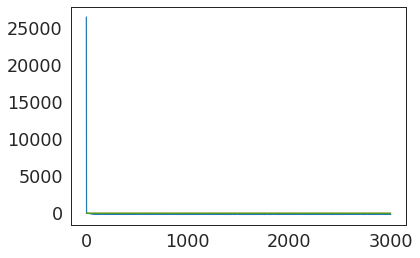

In [143]:
# size of the latent space
latent_dim = 9
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [144]:
model =load_model('/content/models/trained_generated_model.h5')

In [145]:
latent_points = generate_latent_points(9, 300)
X = model.predict(latent_points)
data_fake = pd.DataFrame(data=X,  columns=features)
data_fake.head()

,ntl_area_mn,ntl_cai_mn,ntl_clumpy,ntl_cohesion,ntl_contig_mn,ntl_dcad,ntl_ed,ntl_lpi,ntl_lsi,ntl_np,...,ntl_count,ntl_median,ntl_variance,totpop,LENGTH,COUNT,coastal,Longitude,Latitude,bins
0,6.4292,4.0786,0.6244,4.9175,1.3023,0.0986,0.4015,4.4586,1.1322,2.3852,...,6.5357,5.0940,4.0871,5.0201,5.0640,5.5878,-0.0909,-3.3192,3.5683,5.2324
1,10.0621,6.4933,0.8282,7.4361,0.5300,0.3821,1.7436,6.2665,1.8331,4.0151,...,7.9592,6.5384,6.0264,5.8348,7.3117,8.3350,0.5806,-5.7436,4.8340,7.4036
2,6.0830,4.2369,0.0262,4.9004,0.0249,0.2456,0.7218,4.1731,0.7712,2.3516,...,4.8885,3.7810,3.5317,3.3548,4.4975,5.5089,0.3795,-3.5813,3.4745,4.4935
3,5.2256,3.5296,-0.0696,4.2463,0.0024,-0.1565,0.0774,3.4122,0.7426,1.8301,...,3.6649,3.1070,2.4201,3.4126,3.1660,4.6101,0.4655,-2.5142,3.1402,3.9800
4,7.0712,5.0066,-0.5951,6.8569,1.4564,-0.0674,0.3206,5.0703,1.2015,2.3240,...,6.7694,4.8441,4.5476,4.3888,6.2815,6.7596,-0.6048,-3.9734,4.3762,5.1133


In [146]:
data_fake['bins'].describe()

count   300.0000
mean      6.2145
std       2.1824
min       2.2738
25%       4.5667
50%       5.9520
75%       7.5651
max      14.1507
Name: bins, dtype: float64

In [147]:
data_fake['bins'] = np.floor(data_fake['bins'])
data_fake["bins"] = data_fake["bins"].astype(int)

In [148]:
data_fake["bins"].describe()

count   300.0000
mean      5.7100
std       2.2292
min       2.0000
25%       4.0000
50%       5.0000
75%       7.0000
max      14.0000
Name: bins, dtype: float64

In [149]:
X_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [150]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(X_fake_train,y_fake_train)
y_fake_pred=clf_fake.predict(X_fake_test)
print("Accuracy of fake data model:",metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model:",metrics.classification_report(y_fake_test, y_fake_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of fake data model: 0.9
Classification report of fake data model:               precision    recall  f1-score   support

           2       0.83      1.00      0.91         5
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00        14
           5       0.89      0.94      0.91        17
           6       0.92      0.85      0.88        13
           7       0.94      0.94      0.94        18
           8       0.80      0.89      0.84         9
           9       0.00      0.00      0.00         1
          10       0.33      1.00      0.50         1
          11       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1

    accuracy                           0.90        90
   macro avg       0.70      0.77      0.72        90
weighted avg       0.89      0.90      0.89        90



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
from table_evaluator import load_data, TableEvaluator
categorical_cols=[ 'coastal', 'bins']
table_evaluator = TableEvaluator(data, data_fake,cat_cols=categorical_cols)
table_evaluator.evaluate(target_col='bins')

/usr/local/lib/python3.7/dist-packages/table_evaluator/metrics.py:42: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true))



Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.0833   0.5833              0.0526
DecisionTreeClassifier_real   0.4500   0.0167              0.0169
LogisticRegression_fake       0.0000   0.3500              0.0084
LogisticRegression_real       0.2500   0.1167              0.2000
MLPClassifier_fake            0.1833   0.3167              0.1321
MLPClassifier_real            0.1667   0.1500              0.0811
RandomForestClassifier_fake   0.0167   0.6667              0.0084
RandomForestClassifier_real   0.3833   0.0167              0.0256

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    4.0574
nearest neighbor std                     2.1156

Miscellaneous results:
                                  Result
Column Cor

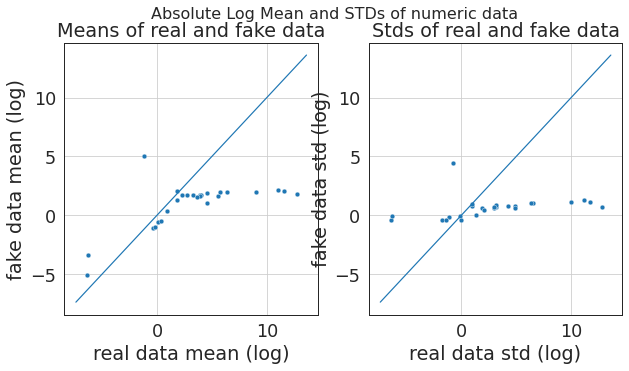

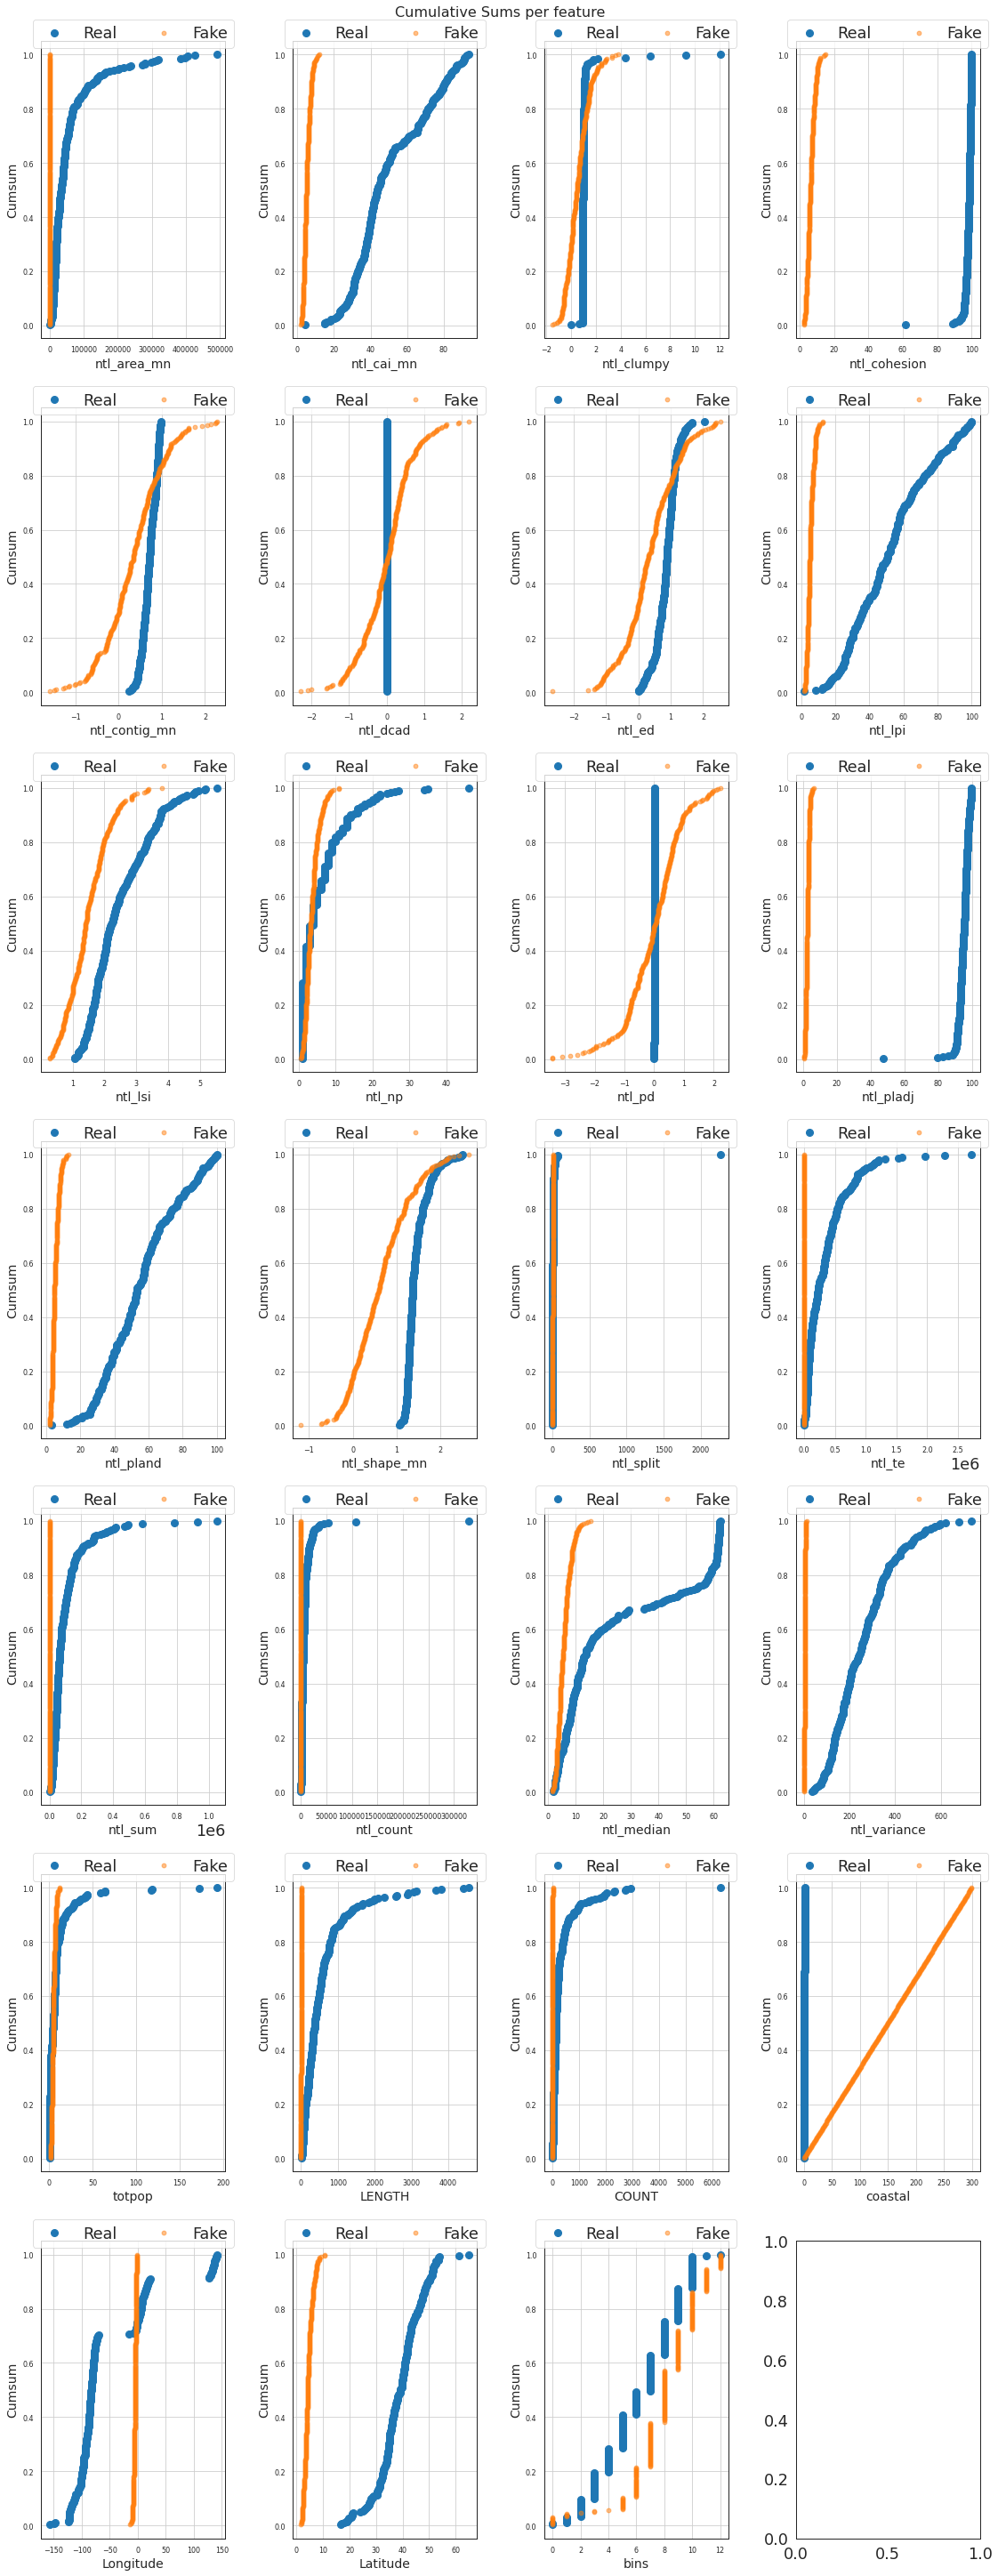

ValueError: ignored

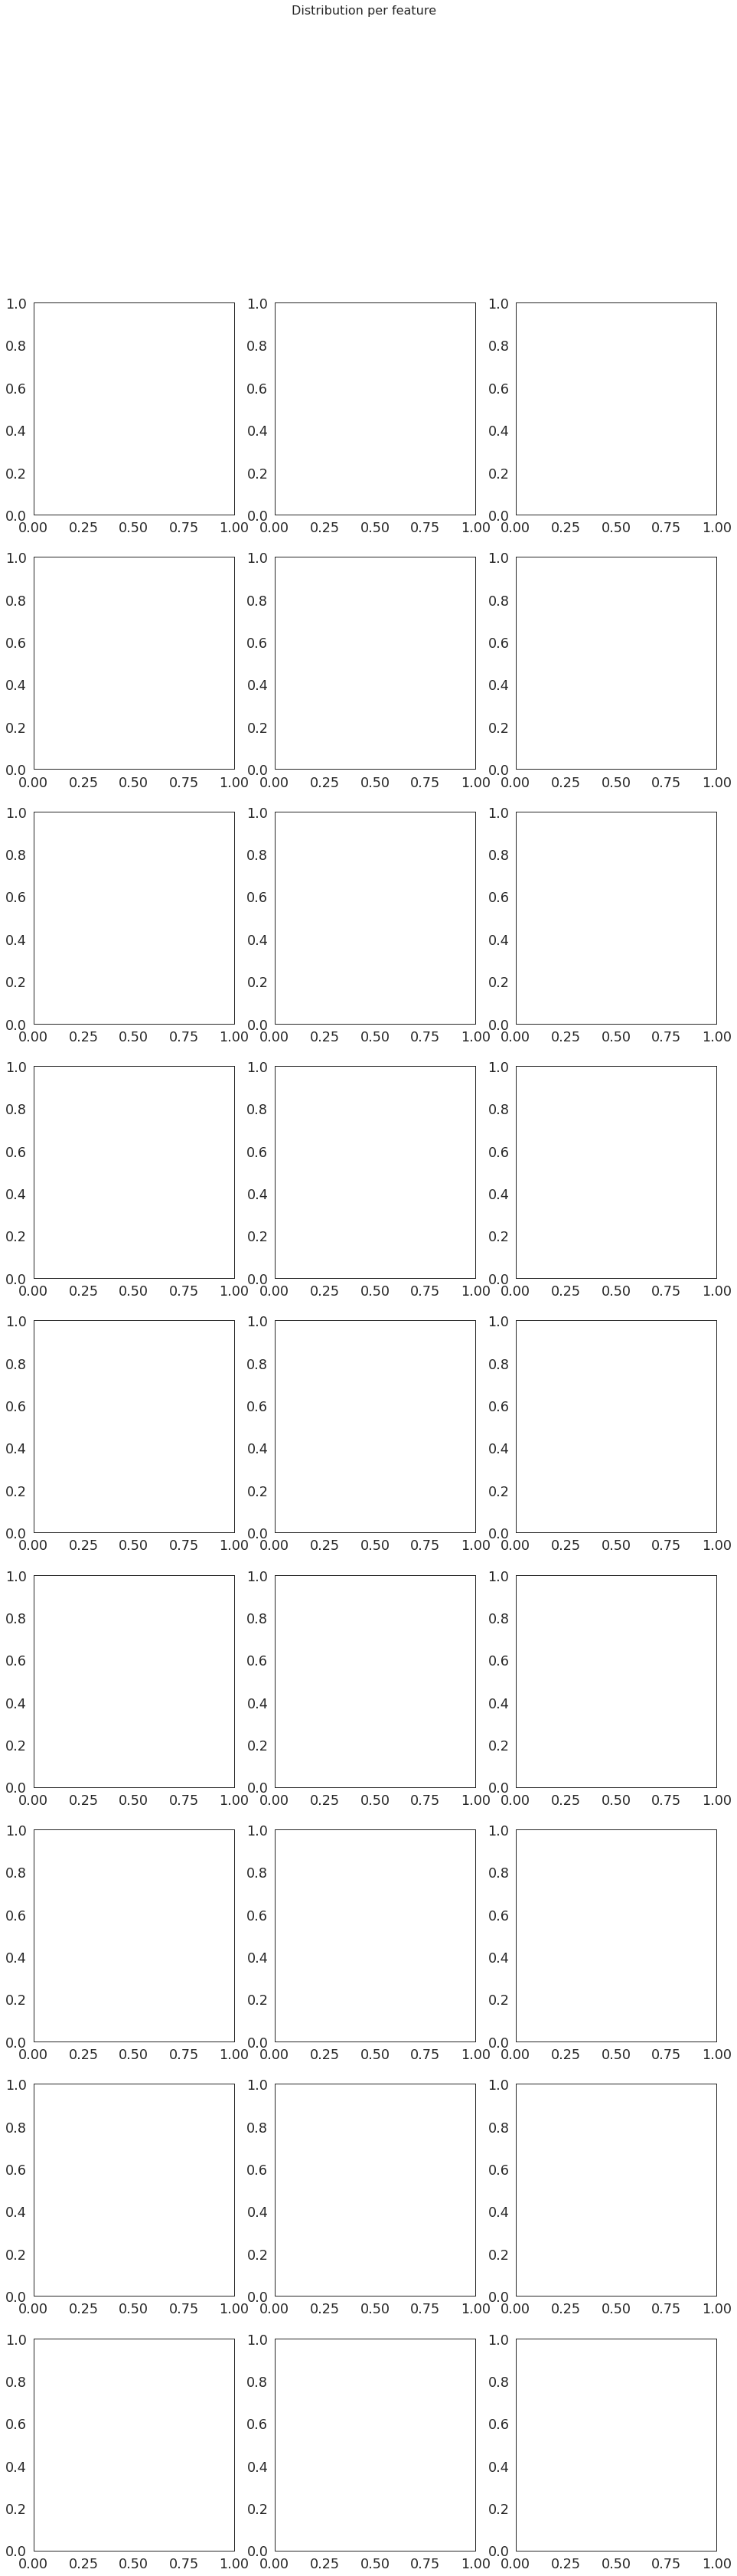

In [152]:

table_evaluator.visual_evaluation()


In [153]:
X = data[features]
y = data[label]
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = RandomForestRegressor()
model.fit(X_true_train,y_true_train)
y_hat = model.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("RMSE:               ", math.sqrt(mse))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RMSE:                0.1841200578283535


In [154]:
Xf = data_fake[features]
yf = data_fake[label]
X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(Xf, yf, test_size=0.30, random_state=42)
model = RandomForestRegressor()
model.fit(X_true_train,y_true_train)
y_hat = model.predict(Xf)
mae = metrics.mean_absolute_error(yf,y_hat)
mse = metrics.mean_squared_error(yf,y_hat)
print ("RMSE:               ", math.sqrt(mse))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RMSE:                0.09420191080864546


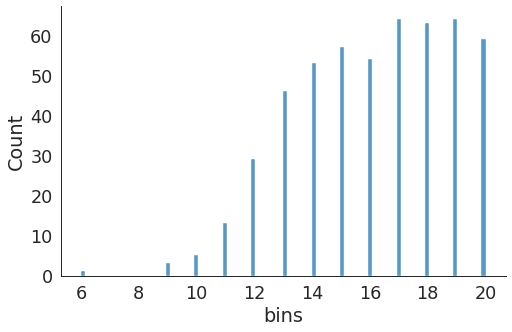

In [155]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=data, x="bins", kind="hist", bins = 100, aspect = 1.5)

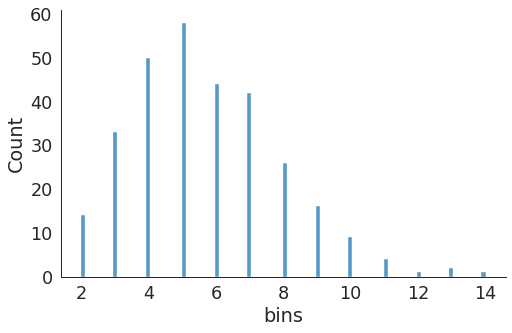

In [156]:
sns.displot(data=data_fake, x="bins", kind="hist", bins = 100, aspect = 1.5)